In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\files\train.csv'

In [3]:
frame = pd.read_csv(path, index_col = 0)

In [4]:
df = frame.iloc[:, 40: 60]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CentralAir    1460 non-null   object 
 1   Electrical    1459 non-null   object 
 2   1stFlrSF      1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   LowQualFinSF  1460 non-null   int64  
 5   GrLivArea     1460 non-null   int64  
 6   BsmtFullBath  1460 non-null   int64  
 7   BsmtHalfBath  1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   HalfBath      1460 non-null   int64  
 10  BedroomAbvGr  1460 non-null   int64  
 11  KitchenAbvGr  1460 non-null   int64  
 12  KitchenQual   1460 non-null   object 
 13  TotRmsAbvGrd  1460 non-null   int64  
 14  Functional    1460 non-null   object 
 15  Fireplaces    1460 non-null   int64  
 16  FireplaceQu   770 non-null    object 
 17  GarageType    1379 non-null   object 
 18  GarageYrBlt   1379 non-null 

In [6]:
# Handling missing values

In [7]:
df[df['Electrical'].isnull()]

,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish
Id,,,,,,,,,,,,,,,,,,,,
1380,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin


In [8]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [9]:
df['SalePrice'] = frame['SalePrice']

In [10]:
sns.set_style('whitegrid')

In [11]:
def graph(col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4 ))
    
    ax1 = sns.boxplot(x = col, palette = 'Set3', ax = ax1)
    ax1.set_title('Boxplot {}'.format(col.name), fontsize = 13)
    
    ax2 = sns.scatterplot(y = df['SalePrice'], x = col, color = 'forestgreen', ax = ax2)
    ax2.set_title('Scatterplot {}'.format(col.name), fontsize = 13)
    
    
    plt.show()

In [12]:
df.loc[df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [13]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### As most values are either 'good' or 'average' and almost half of all data missed I'll just drop this column entirely

In [14]:
df.drop(columns = ['FireplaceQu'], inplace = True)

In [15]:
df[df['GarageType'].isnull()].iloc[:10, :]

,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,SalePrice
Id,,,,,,,,,,,,,,,,,,,,
40,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,82000
49,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,113000
79,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,136500
89,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,85000
90,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,123600
100,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,128950
109,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,115000
126,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,84500
128,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,NaN,NaN,NaN,87000


#### I assumed that GarageType, GarageYrBlt and GarageFinish can be missed at the same time. So I checked first 10 rows and I'll make assumption that other rows are missed to. So I'll just see if they are worthy and if not,  drop them later

In [16]:
# Handling data types

In [17]:
df.iloc[:, :2] = df.iloc[:, :2].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CentralAir    1460 non-null   category
 1   Electrical    1460 non-null   category
 2   1stFlrSF      1460 non-null   int64   
 3   2ndFlrSF      1460 non-null   int64   
 4   LowQualFinSF  1460 non-null   int64   
 5   GrLivArea     1460 non-null   int64   
 6   BsmtFullBath  1460 non-null   int64   
 7   BsmtHalfBath  1460 non-null   int64   
 8   FullBath      1460 non-null   int64   
 9   HalfBath      1460 non-null   int64   
 10  BedroomAbvGr  1460 non-null   int64   
 11  KitchenAbvGr  1460 non-null   int64   
 12  KitchenQual   1460 non-null   object  
 13  TotRmsAbvGrd  1460 non-null   int64   
 14  Functional    1460 non-null   object  
 15  Fireplaces    1460 non-null   int64   
 16  GarageType    1379 non-null   object  
 17  GarageYrBlt   1379 non-null   float64 
 18  GarageFi

In [19]:
df.iloc[:, 12] = df.iloc[:, 12].astype('category')

In [20]:
df.iloc[:, 14] = df.iloc[:, 14].astype('category')

In [21]:
df.iloc[:, 16] = df.iloc[:, 16].astype('category')

In [22]:
df.iloc[:, 18] = df.iloc[:, 18].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CentralAir    1460 non-null   category
 1   Electrical    1460 non-null   category
 2   1stFlrSF      1460 non-null   int64   
 3   2ndFlrSF      1460 non-null   int64   
 4   LowQualFinSF  1460 non-null   int64   
 5   GrLivArea     1460 non-null   int64   
 6   BsmtFullBath  1460 non-null   int64   
 7   BsmtHalfBath  1460 non-null   int64   
 8   FullBath      1460 non-null   int64   
 9   HalfBath      1460 non-null   int64   
 10  BedroomAbvGr  1460 non-null   int64   
 11  KitchenAbvGr  1460 non-null   int64   
 12  KitchenQual   1460 non-null   category
 13  TotRmsAbvGrd  1460 non-null   int64   
 14  Functional    1460 non-null   category
 15  Fireplaces    1460 non-null   int64   
 16  GarageType    1379 non-null   category
 17  GarageYrBlt   1379 non-null   float64 
 18  GarageFi

In [24]:
cat_col = ['CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish']

In [25]:
for col in cat_col:
    
    categories = (list(df[col].cat.categories)) # All values of column
    number_of_categories = len(categories)
    replace_list = list(range(number_of_categories)) # Number equivalents of categories
    replace_dict = {}
    
    for i in range(number_of_categories): # Making replace dict
        replace_dict[categories[i]] = replace_list[i]
    
    df[col] = df[col].replace(replace_dict)

### This time I'll start with categorical features as they are fewer

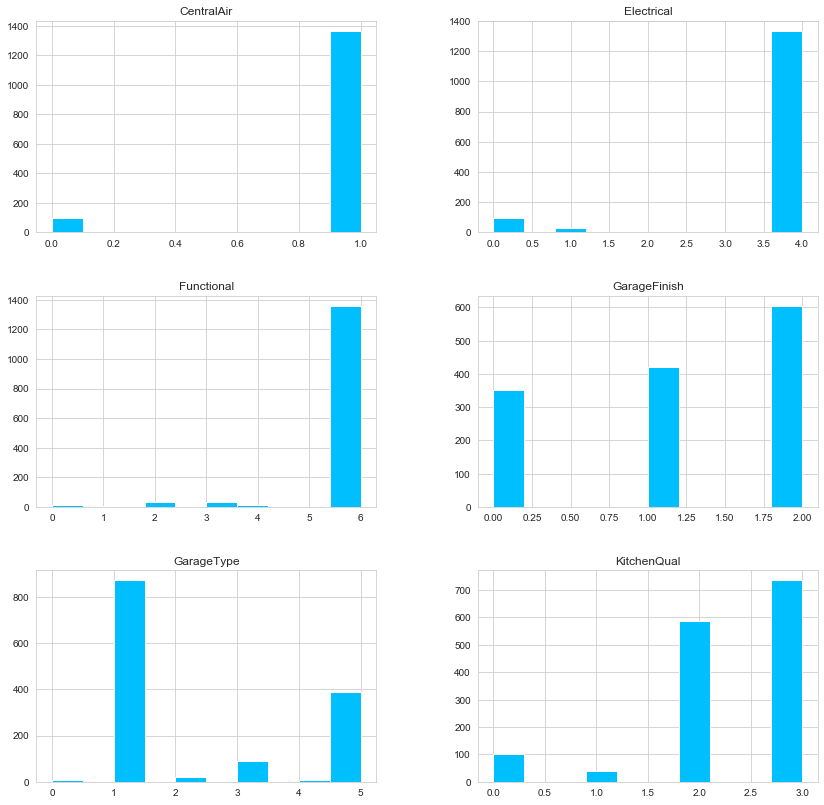

In [26]:
df[cat_col].hist(figsize = (14,14), color = 'deepskyblue')
plt.show()

#### Now I'll work with KitchenQual, then with Garage features, as others have awful distributions

In [27]:
# KitchenQual

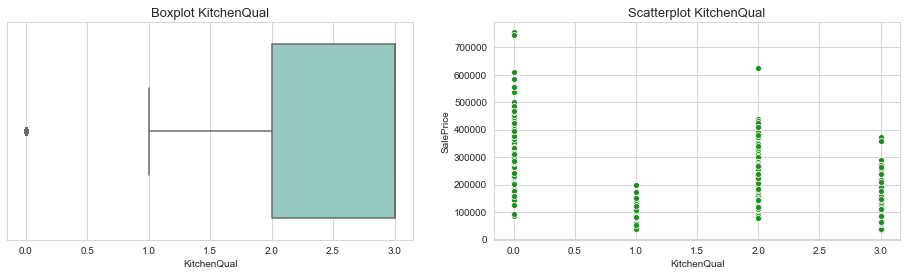

In [28]:
graph(df['KitchenQual'])

In [29]:
def boxplot(feature):
    plt.figure(figsize = (8,6))
    sns.boxplot(x = feature, y = df['SalePrice'], palette = 'Set3')
    plt.title('Boxpot {}'.format(feature.name), fontsize = 13)
    plt.show()

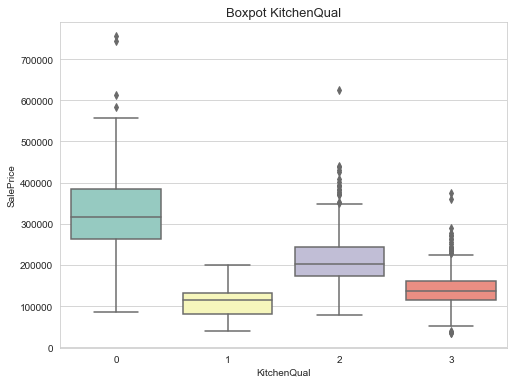

In [30]:
boxplot(df['KitchenQual'])

In [31]:
# GarageType and GarageFinish

#### I noticed from text file that missed valued can talk about absence of latest

In [32]:
#df.info()

In [33]:
# As I have replaced all cat data with numbers repalcing all three columns is difficult 

In [34]:
df.loc[df['GarageType'].isnull(), 'GarageType'] = 6

In [35]:
df.loc[df['GarageFinish'].isnull(), 'GarageFinish'] = 3

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CentralAir    1460 non-null   int64  
 1   Electrical    1460 non-null   int64  
 2   1stFlrSF      1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   LowQualFinSF  1460 non-null   int64  
 5   GrLivArea     1460 non-null   int64  
 6   BsmtFullBath  1460 non-null   int64  
 7   BsmtHalfBath  1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   HalfBath      1460 non-null   int64  
 10  BedroomAbvGr  1460 non-null   int64  
 11  KitchenAbvGr  1460 non-null   int64  
 12  KitchenQual   1460 non-null   int64  
 13  TotRmsAbvGrd  1460 non-null   int64  
 14  Functional    1460 non-null   int64  
 15  Fireplaces    1460 non-null   int64  
 16  GarageType    1460 non-null   float64
 17  GarageYrBlt   1379 non-null   float64
 18  GarageFinish  1460 non-null 

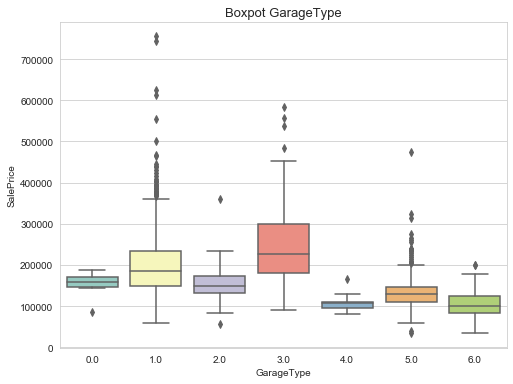

In [37]:
boxplot(df['GarageType'])

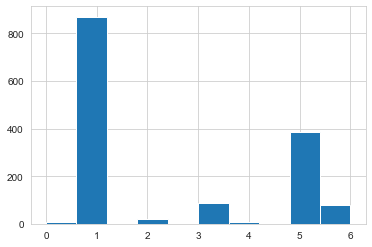

In [38]:
df['GarageType'].hist()
plt.show()

In [39]:
df.GarageType.value_counts()

1.0    870
5.0    387
3.0     88
6.0     81
2.0     19
4.0      9
0.0      6
Name: GarageType, dtype: int64

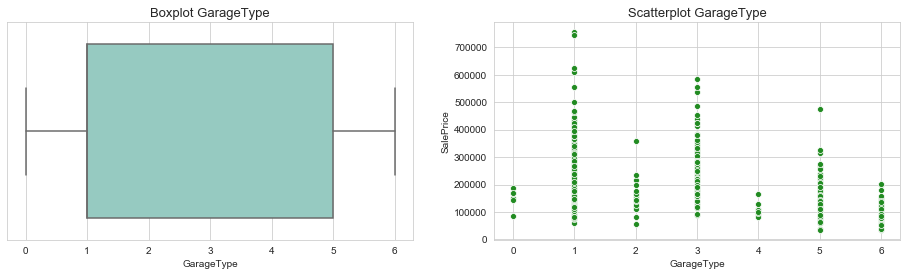

In [40]:
graph(df['GarageType'])

### Test

In [41]:
from sklearn import linear_model, model_selection, metrics, ensemble

In [42]:
reg = linear_model.Ridge()

In [43]:
model_data = pd.get_dummies(df['GarageType'])

In [44]:
print(model_selection.cross_val_score(reg, X = model_data, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

[-0.10201145 -0.11875957 -0.11235642 -0.10801132 -0.11173344]


In [45]:
test = pd.DataFrame(df['GarageType'].copy())

In [46]:
test.loc[test['GarageType'] == 4, 'GarageType'] = 6

In [47]:
test.loc[test['GarageType'] == 0 | 2, 'GarageType'] = 5

In [48]:
model_data_2 = pd.get_dummies(test['GarageType'])

In [49]:
print(model_selection.cross_val_score(reg, X = model_data_2, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

[-0.10157145 -0.11925192 -0.11284028 -0.10809925 -0.11227878]


In [50]:
del reg, model_data, model_data_2, test

### Results
#### There is no need to change something

In [51]:
# Blanck page

### Summary of cat features: I'll keep - ['KitchenQual', 'GarageType', 'GarageFinish']

In [52]:
for i in ['KitchenQual', 'GarageType', 'GarageFinish']:
    cat_col.remove(i)

In [53]:
cat_col

['CentralAir', 'Electrical', 'Functional']

In [54]:
df.drop(columns = cat_col, inplace =True)

### Chapter 3: Countiues features

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   int64  
 2   LowQualFinSF  1460 non-null   int64  
 3   GrLivArea     1460 non-null   int64  
 4   BsmtFullBath  1460 non-null   int64  
 5   BsmtHalfBath  1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   HalfBath      1460 non-null   int64  
 8   BedroomAbvGr  1460 non-null   int64  
 9   KitchenAbvGr  1460 non-null   int64  
 10  KitchenQual   1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageType    1460 non-null   float64
 14  GarageYrBlt   1379 non-null   float64
 15  GarageFinish  1460 non-null   float64
 16  SalePrice     1460 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 245.3 KB


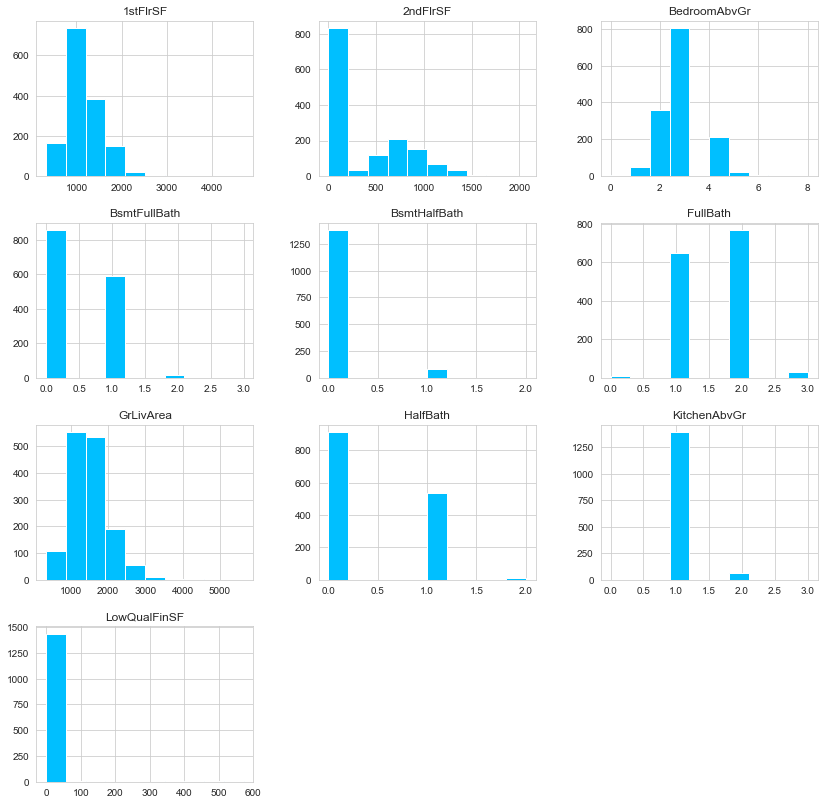

In [56]:
df.iloc[:, :10].hist(color = 'deepskyblue', figsize = (14,14))
plt.show()

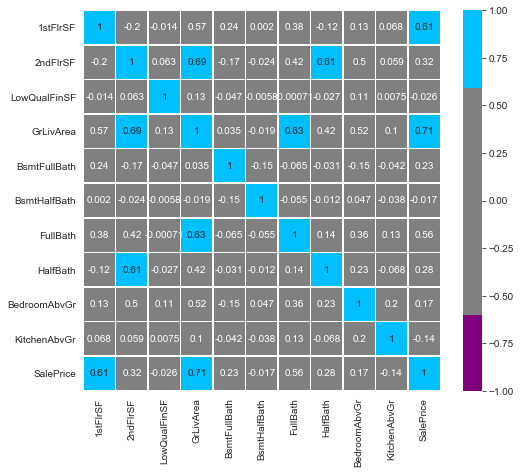

In [57]:
plt.figure(figsize = (8,7))

corr = df.iloc[:, :10].join(df['SalePrice']).corr()

cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

#### Since most of features correlating with GrLiveArea, and the latest has the most correlation with SalePrice, I'll keep only it

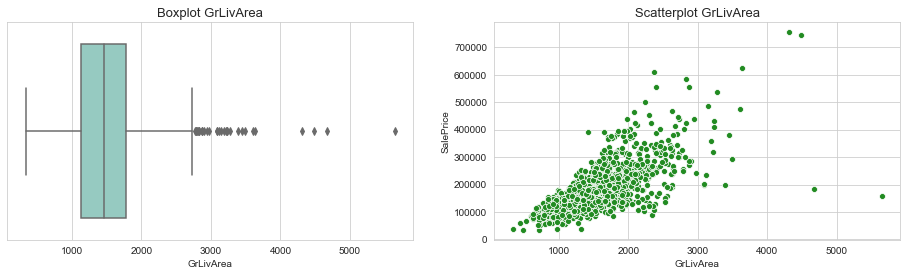

In [58]:
graph(df['GrLivArea'])

In [59]:
df['GrLivArea'].sort_values(ascending = False).iloc[:5]

Id
1299    5642
524     4676
1183    4476
692     4316
1170    3627
Name: GrLivArea, dtype: int64

In [60]:
df.loc[df['GrLivArea'] > 4450, 'GrLivArea'] = 3600
df.loc[df['GrLivArea'] > 4250, 'GrLivArea'] = 3700

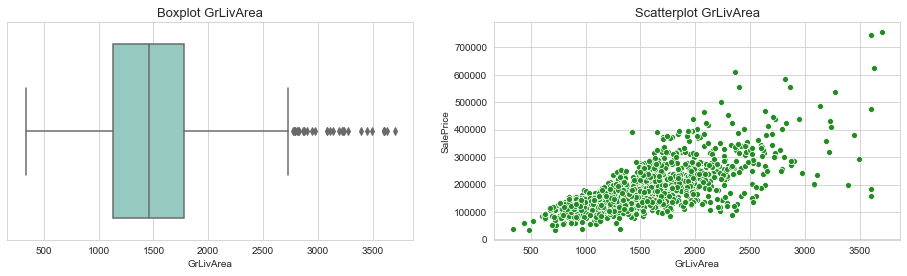

In [61]:
graph(df['GrLivArea'])

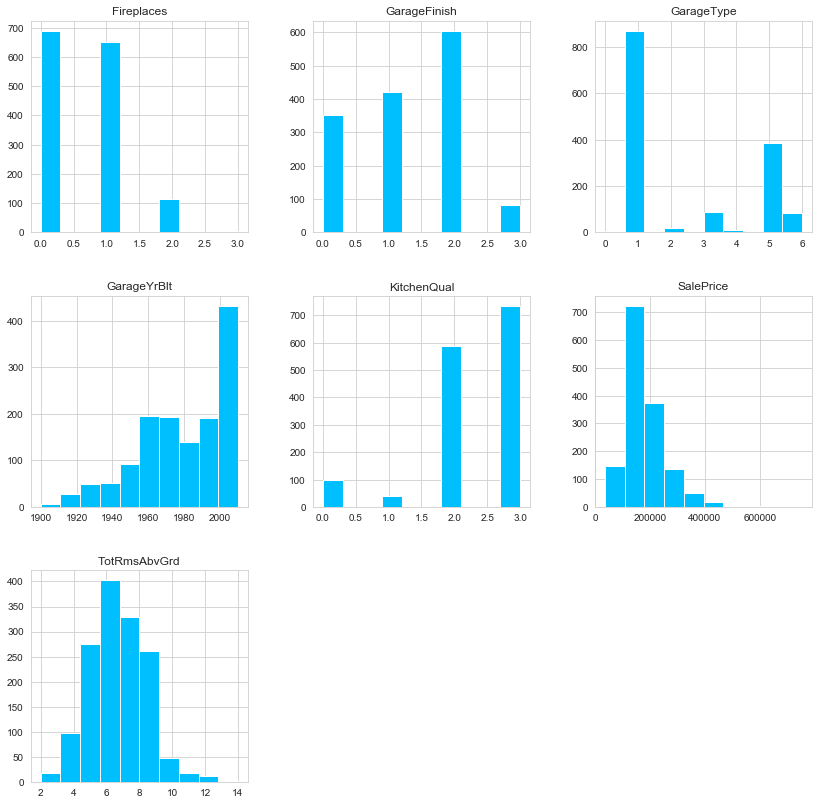

In [62]:
df.iloc[:, 10:].hist(color = 'deepskyblue', figsize = (14,14))
plt.show()

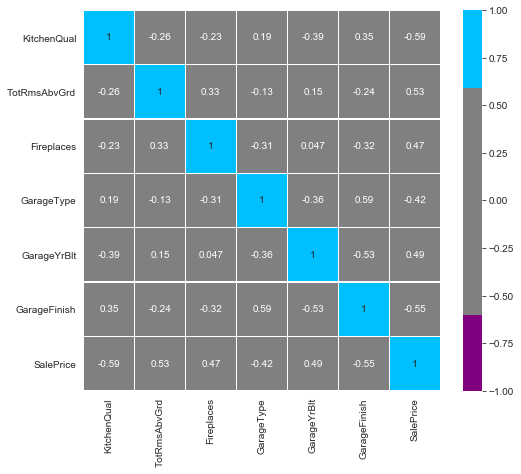

In [63]:
plt.figure(figsize = (8,7))

corr = df.iloc[:, 10:].corr()

cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

#### As each feature is correlating with SalePrice > |0.4| I decided to keep them all

#### Final form will be

In [64]:
df = df.iloc[:, 10:-1].join(df['GrLivArea']).join(df['SalePrice'])

In [65]:
df.head()

,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GrLivArea,SalePrice
Id,,,,,,,,
1,2,8,0,1.0,2003.0,1.0,1710,208500
2,3,6,1,1.0,1976.0,1.0,1262,181500
3,2,6,1,1.0,2001.0,1.0,1786,223500
4,2,7,1,5.0,1998.0,2.0,1717,140000
5,2,9,1,1.0,2000.0,1.0,2198,250000


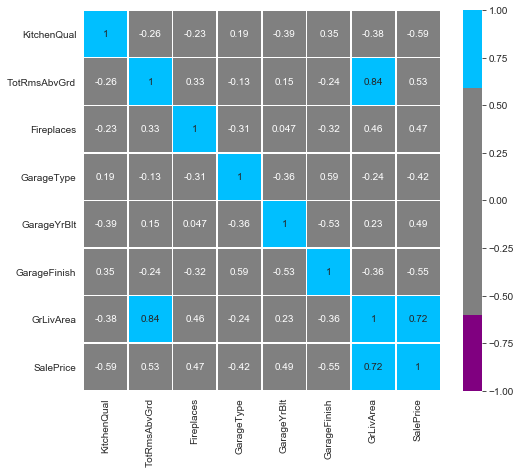

In [66]:
plt.figure(figsize = (8,7))

corr = df.corr()

cmap = ['purple', 'gray', 'gray', 'gray', 'deepskyblue'] # color map

sns.heatmap(corr, linewidth = .5, annot = True, vmin = -1, vmax = 1, center = 0, cmap = cmap)

plt.show()

### Test

#### I want to check whether keeping multicollinearity is good or not

In [67]:
reg = linear_model.Ridge()

In [68]:
dummy_col = ['KitchenQual', 'GarageType', 'GarageFinish']

In [69]:
model_data = df[['TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GrLivArea']].copy()

In [70]:
model_data.loc[model_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = int(model_data['GarageYrBlt'].mean())

In [71]:
model_data['GarageYrBlt'] = model_data['GarageYrBlt'].astype(int) 

In [72]:
for col in dummy_col:
    dummies = pd.get_dummies(df[col])
    model_data = model_data.join(dummies, rsuffix = '_' + str(col), lsuffix =  '_' + str(col))

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
model_data.head()

,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GrLivArea,0_GarageType,1_GarageType,2_GarageType,3_GarageType,0.0_GarageType,1.0_GarageType,2.0_GarageType,3.0_GarageType,4.0,5.0,6.0,0.0,1.0,2.0,3.0
Id,,,,,,,,,,,,,,,,,,,
1,8,0,2003,1710,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,6,1,1976,1262,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,6,1,2001,1786,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,7,1,1998,1717,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
5,9,1,2000,2198,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [75]:
print('Linear Regression with all features')
print(model_selection.cross_val_score(reg, X = model_data, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with all features
[-0.03854172 -0.04206581 -0.04180171 -0.03994247 -0.04292308]


In [76]:
model_data2 = model_data.drop(columns = ['TotRmsAbvGrd'])

In [77]:
print('Linear Regression with all features except total rooms')
print(model_selection.cross_val_score(reg, X = model_data2, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with all features except total rooms
[-0.03840143 -0.0413863  -0.0415977  -0.04189559 -0.04339392]


In [78]:
print('Linear Regression with only GrLivAre')
print(model_selection.cross_val_score(reg, X = np.array(df['GrLivArea']).reshape(-1,1), y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with only GrLivAre
[-0.06856828 -0.06995072 -0.07752166 -0.07518192 -0.08678365]


In [79]:
model_data3 = model_data.drop(columns = ['TotRmsAbvGrd', 'Fireplaces'])

In [80]:
print('Linear Regression with all features except total rooms and fireplaces')
print(model_selection.cross_val_score(reg, X = model_data3, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with all features except total rooms and fireplaces
[-0.04007441 -0.04423772 -0.0421918  -0.04440189 -0.0455442 ]


In [81]:
model_data4 = model_data[['GarageYrBlt', 'GrLivArea']].copy()

In [82]:
dummy_col = ['KitchenQual', 'GarageFinish']
for col in dummy_col:
    dummies = pd.get_dummies(df[col])
    model_data4 = model_data4.join(dummies, rsuffix = '_' + str(col), lsuffix =  '_' + str(col))

In [83]:
print('Linear Regression with few features')
print(model_selection.cross_val_score(reg, X = model_data4, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with few features
[-0.03982568 -0.04317478 -0.04363748 -0.04415827 -0.04821641]


In [84]:
model_data5 = model_data[['Fireplaces', 'GarageYrBlt', 'GrLivArea']].copy()

In [85]:
dummy_col = ['KitchenQual', 'GarageFinish']
for col in dummy_col:
    dummies = pd.get_dummies(df[col])
    model_data5 = model_data5.join(dummies, rsuffix = '_' + str(col))

In [86]:
print('Linear Regression with few features')
print(model_selection.cross_val_score(reg, X = model_data5, y = df['SalePrice'],
                                      cv = 5, scoring = 'neg_mean_squared_log_error'))

Linear Regression with few features
[-0.03756361 -0.04046711 -0.04256617 -0.04131626 -0.04579458]


In [87]:
model_data5.head()

,Fireplaces,GarageYrBlt,GrLivArea,0,1,2,3,0.0_GarageFinish,1.0_GarageFinish,2.0_GarageFinish,3.0_GarageFinish
Id,,,,,,,,,,,
1,0,2003,1710,0,0,1,0,0,1,0,0
2,1,1976,1262,0,0,0,1,0,1,0,0
3,1,2001,1786,0,0,1,0,0,1,0,0
4,1,1998,1717,0,0,1,0,0,0,1,0
5,1,2000,2198,0,0,1,0,0,1,0,0


In [88]:
del reg, dummy_col, model_data, model_data2, model_data3, model_data4

### Conclusion
#### From all this tests I have come to conclusion, that the optimal data will be model_data5 with features - Fireplaces, GarageYrBlt, GrLivArea, KitchenQual and GarageFinish as this data is both 'small' and effective

In [89]:
df = model_data5

In [90]:
df.head()

,Fireplaces,GarageYrBlt,GrLivArea,0,1,2,3,0.0_GarageFinish,1.0_GarageFinish,2.0_GarageFinish,3.0_GarageFinish
Id,,,,,,,,,,,
1,0,2003,1710,0,0,1,0,0,1,0,0
2,1,1976,1262,0,0,0,1,0,1,0,0
3,1,2001,1786,0,0,1,0,0,1,0,0
4,1,1998,1717,0,0,1,0,0,0,1,0
5,1,2000,2198,0,0,1,0,0,1,0,0


In [91]:
df.to_csv(r'C:\Users\Gev\Desktop\Data science\house-prices-advanced-regression-techniques\Train_data\part3.csv')